In [1]:
import numpy as np
import matplotlib.pyplot as plt
def flatten_2d(i, j, a):
    return i * a + j # serial No. = row No. * lenght + colum No.
def unflatten_2d(n, a):
    j = n % a
    i = (n - j) // a
    return i, j

# Generate the adjacency list
'''def gen_neighbors_1d(N):
    neighbors = np.zeros((N, 2), dtype=int)
    for n in range(N):
        neighbors[n][0] = (n - 1) % N # left
        neighbors[n][1] = (n + 1) % N # right
    return neighbors'''

def gen_neighbors_2d(a):
    neighbors = np.zeros((a*a, 4), dtype=int)
    for n in range(a*a):
        i, j = unflatten_2d(n, a)
        neighbors[n][0] = flatten_2d(i, (j - 1) % a, a) # left
        neighbors[n][1] = flatten_2d(i, (j + 1) % a, a) # right
        neighbors[n][2] = flatten_2d((i - 1) % a, j, a) # up
        neighbors[n][3] = flatten_2d((i + 1) % a, j, a) # down
    return neighbors

In [2]:
def MH_single_flip(neighbors_list, T, iterations):
    '''
    This function performs single flip MC iterations for an Ising system with arbitrary topology, 
    given by the adjaceny list `neighbors_list`.
    The inital state is chosen randomly.
    
    Returns
    =======
    `magnetization`: magnetization (average molecular spin) at each MC step
    `energy`: total energy of the system at each MC step
    '''
    # Initialization
    size = neighbors_list.shape[0]
    spins = np.random.random_integers(0, 1, size)
    spins[spins == 0] = -1
    # Allocation
    magnetization = np.zeros(iterations + 1)
    energy = np.zeros(iterations + 1)
    magnetization[0] =spins.sum()
    energy[0] = -spins.dot(spins[neighbors_list].sum(axis=1)) / 2
    
    for step in range(iterations):
        n = np.random.randint(0, size) # Choose next state according to the a priori distribution
        delta_E = 2 * spins[n] * spins[neighbors_list[n]].sum()
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            # Acceptance
            spins[n] = -spins[n]
            magnetization[step + 1] = magnetization[step] + 2 * spins[n]
            energy[step + 1] = energy[step] + delta_E
        else:
            # Rejection
            magnetization[step + 1] = magnetization[step]
            energy[step + 1] = energy[step]
    return abs(magnetization )/ size, energy /size

In [3]:
def plot_magnetization(L):
    '''if dimension == 1:
        neighbors_list = gen_neighbors_1d(400)'''
    neighbors_list = gen_neighbors_2d(L)
    T_list = [ 1.0, 2, 3.0,4,5,6,7]
    fig = plt.figure(figsize=(12, 40))
    for i in range(7):
        T = T_list[i]
        magnetization, energy = MH_single_flip(neighbors_list, T, 20000)
        # Random walk history
        fig.add_subplot(7, 2, 2 * i + 1)
        if i <=6:
            plt.plot(magnetization)
            plt.ylim(-1, 1)
            plt.ylabel('Magnetization')
            plt.xlabel('Iterations')
            plt.annotate('T = {}'.format(T), (10000,0.8))
            plt.grid()
            plt.savefig('88m'+str(i),dpi=200)
        else:
            plt.plot(magnetization)
            plt.ylim(-1, 1)
            plt.ylabel('Magnetization')
            plt.xlabel('Iterations')
            plt.annotate('T = {}'.format(T), (10000,0.8))
            plt.grid()
            plt.xlabel('Iterations')
            plt.savefig('88m'+str(i),dpi=200)
        
        # Sample distribution histogram
        fig.add_subplot(7, 2, 2 * i + 2)
        if i <=6:
            plt.plot(energy)
            plt.ylim(-1, 1)
            plt.xlabel('Iterations')
            plt.ylabel('Energy')
            plt.annotate('T = {}'.format(T), (10000,0.8))
            plt.grid()
            
        else:
            plt.plot(energy)
            plt.ylim(-1, 1)
            plt.xlabel('Iterations')
            plt.ylabel('Energy')
            plt.annotate('T = {}'.format(T), (10000,0.8))
            plt.grid()
            plt.grid()
            plt.show()
           
            


<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_integers(0, 1, size)
<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_integers(0, 1, size)
<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_integers(0, 1, size)
<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_integers(0, 1, size)
<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_integers(0, 1, size)
<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_i

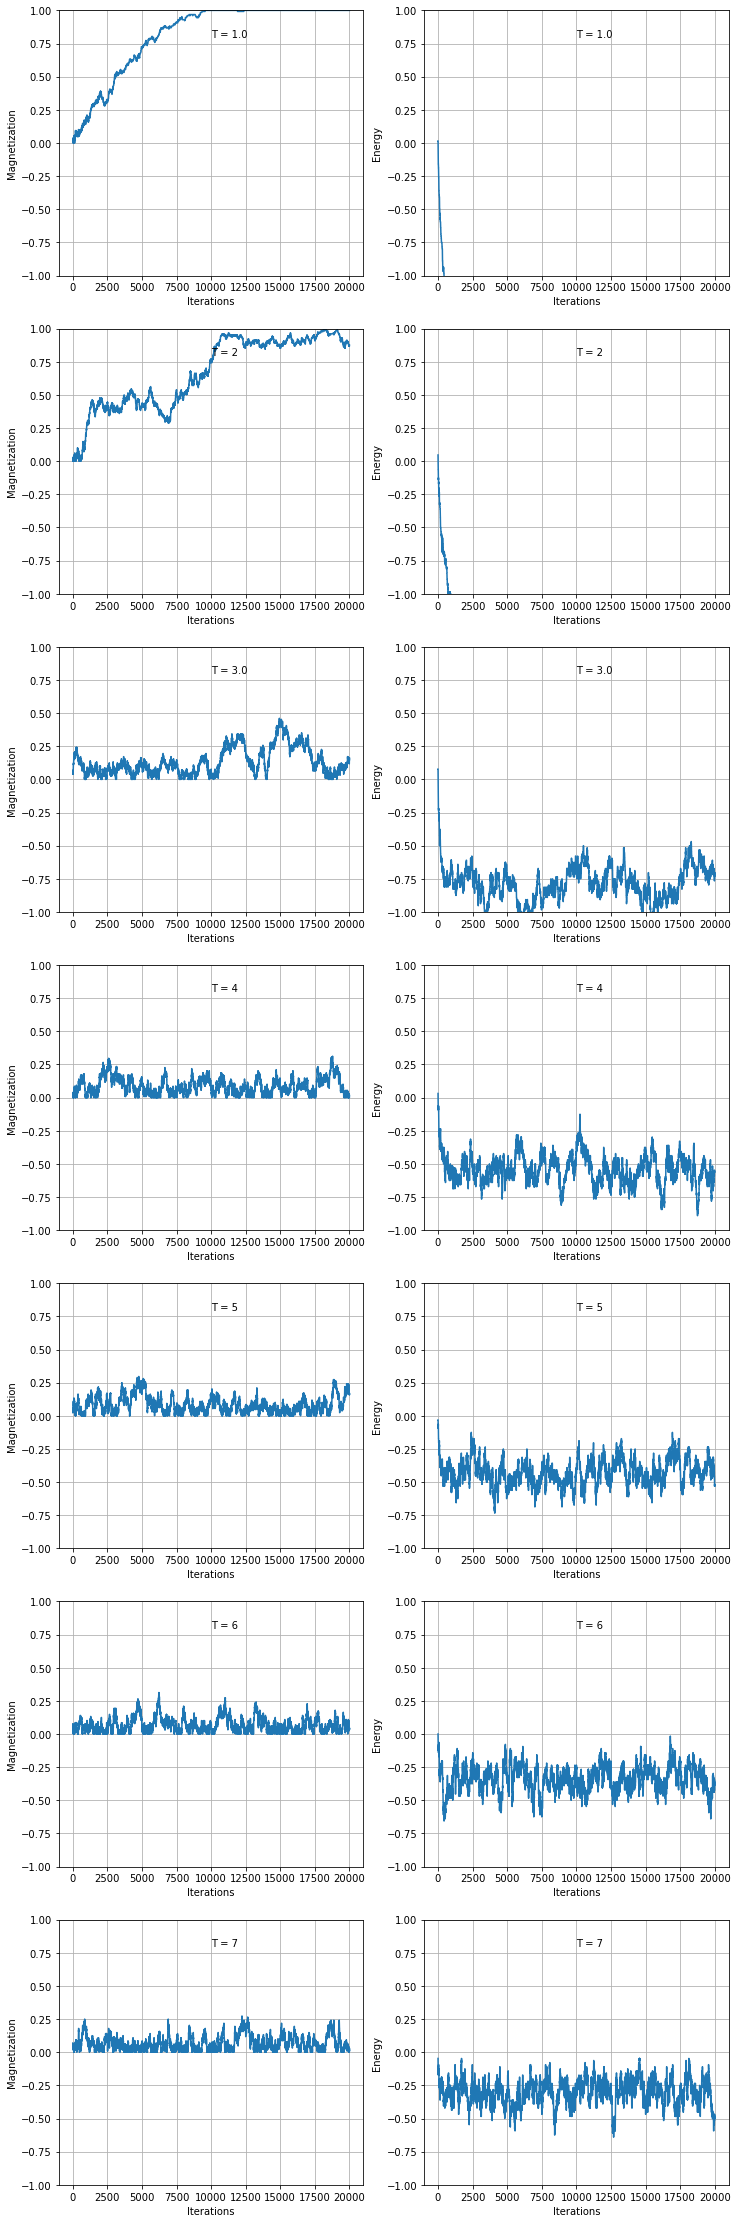

In [4]:
plot_magnetization(16)

In [5]:
def plot_temperature(T_high,L,iterations,check):
    T_list=np.linspace(1,T_high,50)
    neighbors_list = gen_neighbors_2d(L)
    M=[]
    E=[]
    Cv=[]
    for T in T_list:
        mmm=0
        eee=0
        cv=0
        for j in range(check):
            m,e= MH_single_flip(neighbors_list, T, iterations)
            e2=[]
            for i in range(20000):
                e2.append(e[i]**2)
            ee2=np.mean(e2[10000:])
            mm=np.mean(m[10000:])
            ee=np.mean(e[10000:])
            cv+=(ee2-ee**2)/T**2
            mmm+=mm
            eee+=ee
        M.append(mmm/check)
        E.append(eee/(check))
        Cv.append(cv/check)
    return M,E,Cv

<ipython-input-2-2710699df26f>:14: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  spins = np.random.random_integers(0, 1, size)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


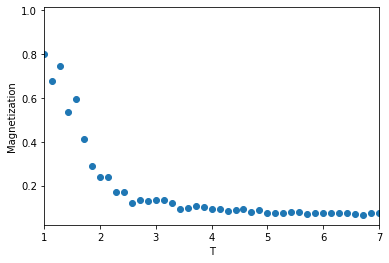

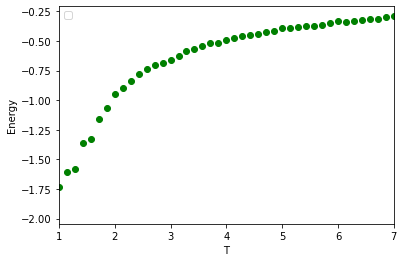

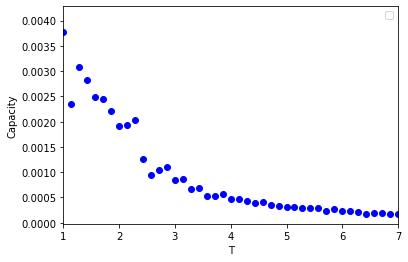

In [6]:
T_high=7
L=16
iterations=20000
check=10
M,E,Cv=plot_temperature(T_high,L,iterations,check)

T=np.linspace(0,T_high,50)
plt.scatter(T,M)
plt.xlabel('T')
plt.ylabel('Magnetization')
plt.xlim(1,7)
plt.savefig('1616Magnetization',dpi=200)
plt.figure()
plt.scatter(T,E,color='g')
plt.xlabel('T')
plt.ylabel('Energy')
plt.xlim(1,7)
plt.legend()
plt.savefig('1616Energy',dpi=200)
plt.figure()
plt.scatter(T,Cv,color='b')
plt.xlabel('T')
plt.ylabel('Capacity')
plt.xlim(1,7)
plt.legend()
plt.savefig('1616Energy',dpi=200)

In [19]:
# Configuration of the final grid
%matplotlib inline
from numpy.random import rand
import matplotlib.animation as animation

class Ising():
    ''' Simulating the Ising model '''
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config

    def simulate(self):
        ims = []
        size = (10, 10)
        FIG, ax = plt.subplots(figsize=size)
        ''' This module simulates the Ising model'''
        N, temp     = 16, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            im = ax.imshow(config, 'gray');
            ims.append([im])
        writer = animation.PillowWriter()
        ani = animation.ArtistAnimation(FIG, ims, interval=50, blit=True, repeat_delay=1000)
        ani.save('test.gif', writer=writer)

    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_)
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')
    plt.show()

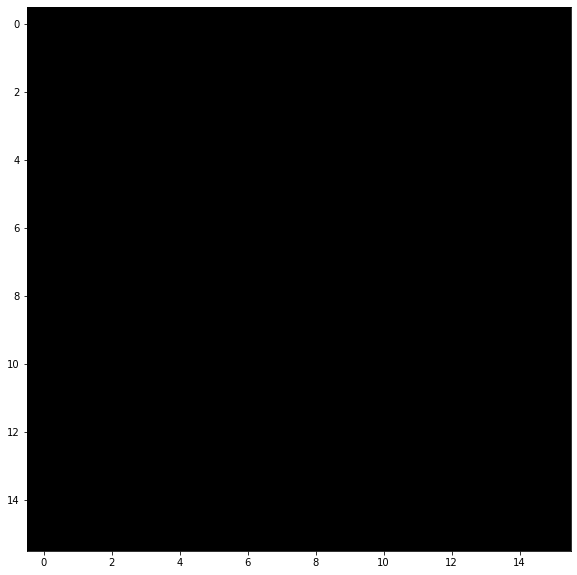

In [20]:
rm = Ising()
rm.simulate()

In [9]:
from __future__ import print_function
import numpy as np

import time
from PIL import Image

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation


#------------------------------------------------------------------------------# 
# Color maps
#------------------------------------------------------------------------------#

cmap1 = colors.ListedColormap(('#8e82fe','#580f41')) #periwinkle and plum

#------------------------------------------------------------------------------# 
# Functions
#------------------------------------------------------------------------------#


def animate_run(LvS, size=(5,5), fps=15, bitrate=1800, filename='run', ticks='off', dpi=100, cmap=cmap1):

    """
        function used to produce run animations, takes awhile, suitable for small/short runs,
        has the advantage of producing clear images of any size
    """

    writer = animation.PillowWriter(fps=fps, metadata=dict(artist='Me'), bitrate=bitrate)
    FIG, ax = plt.subplots(figsize=size)
    ims = []
    plt.axis(ticks)
    
    for L in LvS:
        
        L = np.where(L==1.0, 0, 255)
        im = ax.imshow(L, origin='lower', cmap=cmap)
        ims.append([im])
        
    ani = animation.ArtistAnimation(FIG, ims, interval=50, blit=True, repeat_delay=1000)
    ani.save(filename + '.gif', dpi=dpi, writer=writer)

def fast_animate_run(LvS, resize=True, size=(200,200), fastest=True, filename='run', ticks='off', cmap=cmap1):

    """
        use this to animate very large/long runs
        fastest = True writes a black and white image, but is much faster than using a colormap
        recommended for systems larger than 200x200 lattice points
        size is in pixels
    """

    if fastest:
        gif = [Image.fromarray(np.uint8(L)).convert('RGB') for L in LvS]
    else:
        gif = [Image.fromarray(np.uint8(cmap(L)*255)) for L in LvS]
    
    if resize:
        gif = [img.resize(size) for img in gif]

    gif[0].save(filename + '.gif', save_all=True, optimize=False, append_images=gif[1:], loop=0)

#------------------------------------------------------------------------------# 
# Usage example
#------------------------------------------------------------------------------#

if __name__ == '__main__':

    start_time = time.time()
    L = Ising()
    summary, frames = cooling(L, np.linspace(2,0.5,20), 20)
    fast_animate_run(frames, size=(500,500))
    print('--- %s seconds ---' % (time.time() - start_time))
    

NameError: name 'cooling' is not defined

In [ ]:
from __future__ import print_function
import numpy as np
from numba import jit
import time
from PIL import Image

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation

#------------------------------------------------------------------------------# 
# Color maps
#------------------------------------------------------------------------------#

cmap1 = colors.ListedColormap(('#8e82fe','#580f41')) #periwinkle and plum

#------------------------------------------------------------------------------# 
# Functions
#------------------------------------------------------------------------------#

@jit
def initialize_lattice_random(nrow, ncol):

    """
        initialize a lattice with randomly oriented spins
    """

    return np.where(np.random.random((nrow,ncol))>0.5,1,-1)

@jit
def initialize_lattice_uniform(nrow, ncol, spin=1):

    """
        initialize a lattice with spins all in the same direction
    """

    return np.ones((nrow,ncol), dtype=np.int64) * spin

@jit
def system_energy(lattice, J, H):

    """
        J is the spin interaction parameter, J > 0 = ferromagnetic, J < 0 = antiferromagnetic
        H is an external magnetic field (constant)
    """

    nrow,ncol = lattice.shape
    E = 0.0

    for i in range(nrow):
        for j in range(ncol):

            S  = lattice[i,j]
            NS = lattice[(i+1)%nrow, j] + lattice[i,(j+1)%ncol] + lattice[(i-1)%nrow, j] + lattice[i,(j-1)%ncol]
            E += -1 * ((J * S * NS) + (H * S))

    return E/4

@jit
def system_magnetization(lattice):

    """
        calculate the system magnetization, just a rename of np.sum for physical interpretation
    """

    return np.sum(lattice)

@jit
def MC_cycle(lattice, J, H, T):

    """
        A single MC cycle (considering all lattice points)
        T is the temperature
    """

    T = float(T)
    naccept = 0 
    nrow,ncol = lattice.shape 
    E = system_energy(lattice, J, H) 
    M = system_magnetization(lattice)

    for i in range(nrow): 
        for j in range(ncol):

            S = lattice[i,j]
            NS = lattice[(i+1)%nrow, j] + lattice[i,(j+1)%ncol] + lattice[(i-1)%nrow, j] + lattice[i,(j-1)%ncol]
            dE = 2*J*S*NS + 2*H*S
            accept = np.random.random()

            if dE < 0.0 or accept < np.exp((-1.0 * dE)/T):
                naccept += 1
                S *= -1
                E += dE
                M += 2*S

            lattice[i,j] = S

    return lattice, E, M, naccept

@jit
def run(lattice, N_cycles, J=1, H=0, T=1.0, standard_output=False):

    """
        The summary function, which runs an MC simulation of N_cycles
    """

    nrow,ncol = lattice.shape

    lattice_evolve = [np.zeros((nrow,ncol)) for i in range(N_cycles)]
    energy_vs_step = []
    magnet_vs_step = []

    for cyc in range(N_cycles):

        if standard_output:
            print('cycle', cyc + 1, 'out of', N_cycles)

        lattice, E, M, naccept = MC_cycle(lattice, J, H, T)
        lattice_evolve[cyc] += lattice
        energy_vs_step.append(E)
        magnet_vs_step.append(M)

    return lattice, energy_vs_step, magnet_vs_step, lattice_evolve

def cooling(lattice, T_range, N_cycles, J=1, H=0):

    """
        a series of runs at decreasing temperatures
    """

    summary = []
    frames = []
    FL = lattice

    for T in T_range:

        print(f'Temperature = {np.round(T,3)}')
        FL, EvS, MvS, LvS = run(lattice, N_cycles, J=J, H=H, T=T) # make sure the lattice is the same for next T
        summary.append([J, EvS, MvS])
        frames.extend(LvS)

    return summary, frames

def animate_run(LvS, size=(5,5), fps=15, bitrate=1800, filename='run', ticks='off', dpi=100, cmap=cmap1):

    """
        function used to produce run animations, takes awhile, suitable for small/short runs,
        has the advantage of producing clear images of any size
    """

    writer = animation.PillowWriter(fps=fps, metadata=dict(artist='Me'), bitrate=bitrate)
    FIG, ax = plt.subplots(figsize=size)
    ims = []
    plt.axis(ticks)
    
    for L in LvS:
        
        L = np.where(L==1.0, 0, 255)
        im = ax.imshow(L, origin='lower', cmap=cmap)
        ims.append([im])
        
    ani = animation.ArtistAnimation(FIG, ims, interval=50, blit=True, repeat_delay=1000)
    ani.save(filename + '.gif', dpi=dpi, writer=writer)

def fast_animate_run(LvS, resize=True, size=(200,200), fastest=True, filename='run', ticks='off', cmap=cmap1):

    """
        use this to animate very large/long runs
        fastest = True writes a black and white image, but is much faster than using a colormap
        recommended for systems larger than 200x200 lattice points
        size is in pixels
    """

    if fastest:
        gif = [Image.fromarray(np.uint8(L)).convert('RGB') for L in LvS]
    else:
        gif = [Image.fromarray(np.uint8(cmap(L)*255)) for L in LvS]
    
    if resize:
        gif = [img.resize(size) for img in gif]

    gif[0].save(filename + '.gif', save_all=True, optimize=False, append_images=gif[1:], loop=0)

#------------------------------------------------------------------------------# 
# Usage example
#------------------------------------------------------------------------------#

if __name__ == '__main__':

    start_time = time.time()
    L = initialize_lattice_random(1000, 1000)
    summary, frames = cooling(L, np.linspace(2,0.5,20), 20)
    fast_animate_run(frames, size=(500,500))
    print('--- %s seconds ---' % (time.time() - start_time))
    